In [1]:
#February 2, 2020
#Loads the data set in second and third lines and extracts the 100 samples and 5 features 
import numpy as np 
dataset_filename = "affinity_dataset.txt"
X = np.loadtxt(dataset_filename)
n_samples, n_features = X.shape
print("This dataset has {0} samples and {1} features".format(n_samples, n_features))

This dataset has 100 samples and 5 features


In [2]:
# Prints the first five lines of the transactions
print(X[:5])

[[0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1.]
 [1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1.]]


In [3]:
#The names of the features that correspond to the featured numbers in binary values
features = ["bread", "milk", "cheese", "apples", "bananas"]

In [4]:
# First, we examine how many rows contain the premise: "that a person is buying apples"
num_apple_purchases = 0
for sample in X:
    if sample[3] == 1:  # This person bought Apples, which is the entry in the third position in the array above
        num_apple_purchases += 1
print("{0} people bought Apples".format(num_apple_purchases))

43 people bought Apples


In [5]:
# Examines the transaction of the number of the cases where a person bought Apples involved the people purchasing Bananas as well
# Record both cases where the rule is valid and is invalid.
rule_valid = 0
rule_invalid = 0
for sample in X:
    if sample[3] == 1:  # This person bought Apples
        if sample[4] == 1:
            # This person bought both Apples and Bananas
            rule_valid += 1
        else:
            # This person bought Apples, but not Bananas
            rule_invalid += 1
print("{0} cases of the rule being valid were discovered".format(rule_valid)) #examines number of cases where the rule is followed
print("{0} cases of the rule being invalid were discovered".format(rule_invalid)) #examines number of cases where the rule is not followed

27 cases of the rule being valid were discovered
16 cases of the rule being invalid were discovered


In [6]:
# Now we have all the information needed to compute Support and Confidence
support = rule_valid  # The Support is the number of times the rule is discovered and occurs in a dataset.
confidence = rule_valid / num_apple_purchases 
print("The support is {0} and the confidence is {1:.3f}.".format(support, confidence))
# Confidence can be thought of as a percentage using the following:
print("As a percentage, that is {0:.1f}%.".format(100 * confidence))

The support is 27 and the confidence is 0.628.
As a percentage, that is 62.8%.


In [7]:
#Sets default value if a currently non existant key is accessed, and all rules are set up
from collections import defaultdict
valid_rules = defaultdict(int)
invalid_rules = defaultdict(int) 
num_occurences = defaultdict(int)

#computes each value in a large for loop, iterating each sample on its own, then as a premise and a conclusion, denoting the relationship between each
for sample in X:
    for premise in range(n_features):
        if sample[premise] == 0: continue
        # Record that the premise was bought in another transaction
        num_occurences[premise] += 1
        for conclusion in range(n_features):
            if premise == conclusion:  # It makes little sense to measure if X -> X.
                continue
            if sample[conclusion] == 1:
                # This only includes a person who bought both the premise and also bought the conclusion item
                valid_rules[(premise, conclusion)] += 1
            else:
                # This only includes a person who bought the premise, but not the conclusion
                invalid_rules[(premise, conclusion)] += 1
support = valid_rules 
confidence = defaultdict(float)
for premise, conclusion in valid_rules.keys(): 
    confidence[(premise, conclusion)] = valid_rules[(premise, conclusion)] / num_occurences[premise]

In [8]:
#Goes through the results of the premise and conclusion with confidence and support calculations
#skips over any case where conclusion is the same as premise : "If a person buys cheese, then they buy cheese: Confidence: 1"
for premise, conclusion in confidence:
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print("Rule: If a person buys {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Confidence: {0:.3f}".format(confidence[(premise, conclusion)]))
    print(" - Support: {0}".format(support[(premise, conclusion)]))
    print("")

Rule: If a person buys bread they will also buy milk
 - Confidence: 0.464
 - Support: 13

Rule: If a person buys milk they will also buy bread
 - Confidence: 0.250
 - Support: 13

Rule: If a person buys cheese they will also buy bananas
 - Confidence: 0.513
 - Support: 20

Rule: If a person buys bananas they will also buy cheese
 - Confidence: 0.351
 - Support: 20

Rule: If a person buys cheese they will also buy apples
 - Confidence: 0.564
 - Support: 22

Rule: If a person buys apples they will also buy cheese
 - Confidence: 0.512
 - Support: 22

Rule: If a person buys apples they will also buy bananas
 - Confidence: 0.628
 - Support: 27

Rule: If a person buys bananas they will also buy apples
 - Confidence: 0.474
 - Support: 27

Rule: If a person buys milk they will also buy apples
 - Confidence: 0.346
 - Support: 18

Rule: If a person buys apples they will also buy milk
 - Confidence: 0.419
 - Support: 18

Rule: If a person buys milk they will also buy bananas
 - Confidence: 0.519


In [9]:
#defines the format of the rules
def print_rule(premise, conclusion, support, confidence, features):
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print("Rule: If a person buys {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Confidence: {0:.3f}".format(confidence[(premise, conclusion)]))
    print(" - Support: {0}".format(support[(premise, conclusion)]))
    print("")

In [10]:
premise = 1
conclusion = 3
print_rule(premise, conclusion, support, confidence, features)

Rule: If a person buys milk they will also buy apples
 - Confidence: 0.346
 - Support: 18



In [11]:
#for premise, conclusion in valid_rules.keys():
#rule = (premise, conclusion)
#confidence[rule] = valid_rules[rule] / num_occurences [premise]

# Sort by support
from pprint import pprint
pprint(list(support.items()))


[((0, 1), 13),
 ((1, 0), 13),
 ((2, 4), 20),
 ((4, 2), 20),
 ((2, 3), 22),
 ((3, 2), 22),
 ((3, 4), 27),
 ((4, 3), 27),
 ((1, 3), 18),
 ((3, 1), 18),
 ((1, 4), 27),
 ((4, 1), 27),
 ((0, 2), 5),
 ((2, 0), 5),
 ((0, 4), 16),
 ((4, 0), 16),
 ((1, 2), 11),
 ((2, 1), 11),
 ((0, 3), 9),
 ((3, 0), 9)]


In [12]:
#uses itemgetter class as key in the items function to sort a list containing values in the dictionary and showing the highest values first
from operator import itemgetter
sorted_support = sorted(support.items(), key=itemgetter(1), reverse=True)

In [13]:
for index in range(5):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_support[index][0]
    print_rule(premise, conclusion, support, confidence, features)

Rule #1
Rule: If a person buys apples they will also buy bananas
 - Confidence: 0.628
 - Support: 27

Rule #2
Rule: If a person buys bananas they will also buy apples
 - Confidence: 0.474
 - Support: 27

Rule #3
Rule: If a person buys milk they will also buy bananas
 - Confidence: 0.519
 - Support: 27

Rule #4
Rule: If a person buys bananas they will also buy milk
 - Confidence: 0.474
 - Support: 27

Rule #5
Rule: If a person buys cheese they will also buy apples
 - Confidence: 0.564
 - Support: 22



In [14]:
sorted_confidence = sorted(confidence.items(), key=itemgetter(1), reverse=True)

In [15]:
for index in range(5):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_confidence[index][0]
    print_rule(premise, conclusion, support, confidence, features)

Rule #1
Rule: If a person buys apples they will also buy bananas
 - Confidence: 0.628
 - Support: 27

Rule #2
Rule: If a person buys bread they will also buy bananas
 - Confidence: 0.571
 - Support: 16

Rule #3
Rule: If a person buys cheese they will also buy apples
 - Confidence: 0.564
 - Support: 22

Rule #4
Rule: If a person buys milk they will also buy bananas
 - Confidence: 0.519
 - Support: 27

Rule #5
Rule: If a person buys cheese they will also buy bananas
 - Confidence: 0.513
 - Support: 20



In [16]:
%matplotlib inline


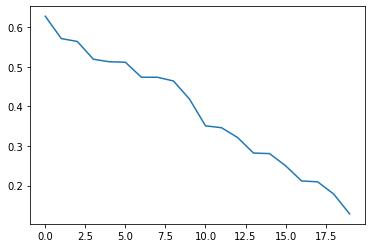

In [17]:
#passes in confidence values to create an inline graph to plot the data
from matplotlib import pyplot as plt
plt.plot([confidence[rule[0]] for rule in sorted_confidence])